Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 3)                12        
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 128)               512       
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

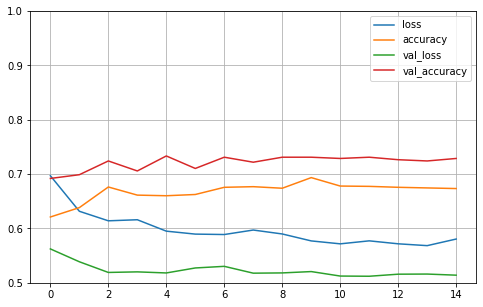

Test accuracy is 0.71


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import layers

d = pd.read_csv("https://raw.githubusercontent.com/maxleungtszchun/Statistical-Learning-with-customer-data/main/data/d.csv", na_values = "NA")
train_d = d.sample(frac = 0.8, random_state = 5)
test_d = d.drop(train_d.index)

train_X = train_d[["negative_r_zScore.x", "f_zScore.x", "m_zScore.x"]]
test_X = test_d[["negative_r_zScore.x", "f_zScore.x", "m_zScore.x"]]

train_y = train_d["return.y"]
test_y = test_d["return.y"]

model = keras.Sequential(
    [
        keras.Input(shape = train_X.shape[1]),
        layers.BatchNormalization(),
        layers.Dense(128, activation = "selu", kernel_initializer = "lecun_normal"),
        layers.Dropout(0.2),
        layers.BatchNormalization(),
        layers.Dense(64, activation = "selu", kernel_initializer = "lecun_normal"),
        layers.Dropout(0.2),
        layers.Dense(1, activation = "sigmoid")
    ]
)

model.summary()
model.compile(loss = "binary_crossentropy", optimizer = "Nadam", metrics = ["accuracy"])

history = model.fit(train_X, train_y, batch_size = 128, epochs = 15, validation_split = 0.2)
pd.DataFrame(history.history).plot(figsize = (8, 5))
plt.grid(True)
plt.gca().set_ylim(0.5, 1)
plt.show()

print("Test accuracy is %.2f" % model.evaluate(test_X, test_y, verbose = 0)[1])